In [1]:
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd

In [2]:
result_file = "20250103-232144.csv"
result_path = os.path.abspath(os.path.join(os.getcwd(),"..","results",result_file))
df = pd.read_csv(result_path)
n_dp = len(df['hop_1'])
df

,q_ID,utterance,answer,entity,hop_1,hop_2
0,WebQTrn-0,what is the name of justin bieber brother?,Jaxon Bieber,Q27801041,['hop_1-Q34086-P3373-Q27801041'],NaN
1,WebQTrn-1,what character did natalie portman play in sta...,Padmé Amidala,Q51789,hop_1-Q42051-P674-Q51789 | hop_1-Q165713-P674-...,NaN
2,WebQTrn-3,what country is the grand bahama island in?,Bahamas,Q778,hop_1-Q866345-P131-Q778 | hop_1-Q866345-P17-Q7...,NaN
3,WebQTrn-4,what kind of money to take to bahamas?,Bahamian dollar,Q194339,NaN,NaN
4,WebQTrn-5,what character did john noble play in lord of ...,Denethor II,Q718380,NaN,NaN
...,...,...,...,...,...,...
3093,WebQTrn-3771,what type of government is the philippines?,Presidential system <SEP> Unitary state <SEP> ...,Q49892 <SEP> Q179164 <SEP> Q7270 <SEP> Q1520223,['hop_1-Q928-P122-Q7270'],NaN
3094,WebQTrn-3772,what do you call russian currency?,Russian ruble,Q41044,['hop_1-Q159-P38-Q41044'],NaN
3095,WebQTrn-3773,where did sir donald bradman live?,Cootamundra,NIL,['hop_1-Q313591-P19-Q2595446'],NaN
3096,WebQTrn-3775,what is the name of the broncos mascot?,Thunder <SEP> Miles,NIL <SEP> NIL,['hop_1-Q223507-P822-Q16993121'],NaN


## Number of Answered Questions
Shows a plot of 1-hop, 2-hop and unanswered questions

<Axes: title={'center': 'Distribution of Hop-Answers, n: 3098'}>

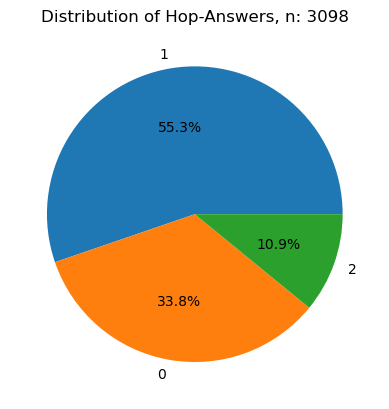

In [3]:
def answer_detector(x):
    """ Create an identifier if the answer is 1-hop, 2-hop or nan"""
    if pd.isna(x):
        return 0
    elif 'hop_2' in x:
        return 2
    elif 'hop_1' in x:
        return 1
df['answer_id'] = df['hop_1'].map(lambda x: answer_detector(x))
value_counts = df['answer_id'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%', 
                      labels=value_counts.index, 
                      ylabel='', 
                      title=f'Distribution of Hop-Answers, n: {n_dp}'
                      )

## Number of Answers per Question
Shows a distribution of number of answers per question

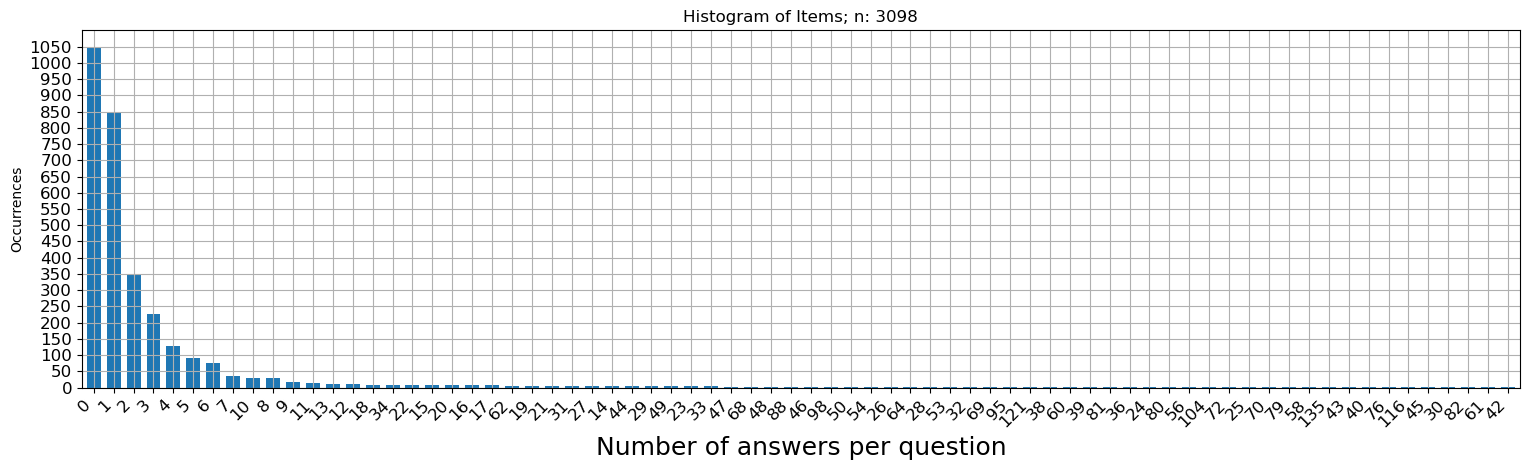

In [4]:
def ans_per_question(x):
    """ Create an identifier if the answer is 1-hop, 2-hop or nan"""
    if pd.isna(x):
        return 0
    elif '|' in x:
        return len(x.split('|'))
    else:
        return 1
df['answer_num'] = df['hop_1'].map(lambda x: ans_per_question(x))
value_counts = df['answer_num'].value_counts()
value_counts.plot.bar(
    ylabel='Occurrences', 
    title=f'Histogram of Items; n: {n_dp}',
    width=0.7,
    fontsize=12
)
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*100+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.xlabel('Number of answers per question', fontsize=18)
plt.yticks(range(0, max(value_counts) + 50, 50))
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


## Number of Null entities in answers
May depict unanswerable questions unless WD has been updated.

,q_ID,utterance,answer,entity,hop_1,hop_2,answer_id,answer_num,answer_status
15,WebQTrn-18,what books did beverly cleary right?,Ramona the Brave <SEP> Dear Mr. Henshaw <SEP> ...,Q7289942 <SEP> Q5246906 <SEP> Q7289913 <SEP> Q...,hop_1-Q1316719-P800-Q18217034 | hop_1-Q1316719...,NaN,1,29,nil_present
18,WebQTrn-22,what to see near sedona arizona?,Sycamore Canyon <SEP> Sedona International Fil...,NIL <SEP> NIL <SEP> Q7445369 <SEP> Q4883249 <S...,NaN,NaN,0,0,nil_present
19,WebQTrn-23,what high school did president bill clinton at...,Hot Springs High School,NIL,['hop_1-Q1124-P69-Q5910453'],NaN,1,1,nil_present
21,WebQTrn-25,what movies does taylor lautner play in?,Run the Tide <SEP> The Ridiculous Six <SEP> He...,Q18391473 <SEP> Q19866927 <SEP> Q5688617 <SEP>...,hop_1-Q23359-P800-Q143716 | hop_1-Q23359-P800-...,NaN,1,3,nil_present
25,WebQTrn-32,what was malcolm x trying to accomplish?,Black Liberation <SEP> African Americans' rights,NIL <SEP> NIL,NaN,NaN,0,0,nil_present


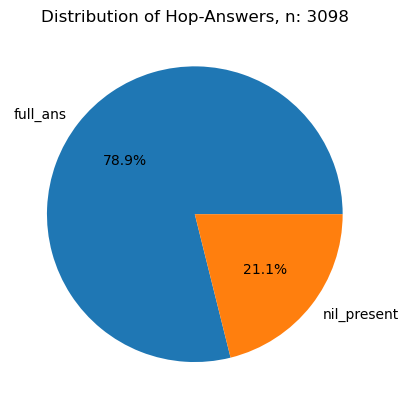

In [5]:
def number_of_answers_with_nulls(x):
    """ Computes whe"""
    if pd.isna(x):
        return 'nil_ans'
    elif 'NIL' in x:
        return 'nil_present'
    else:
        return 'full_ans'
df['answer_status'] = df['entity'].map(lambda x: number_of_answers_with_nulls(x))
value_counts = df['answer_status'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%', 
                      labels=value_counts.index, 
                      ylabel='', 
                      title=f'Distribution of Hop-Answers, n: {n_dp}'
                      )

# print a bunch of datapoints where answer is nil_present
df[df['answer_status'] == 'nil_present'].head()
# df.iloc[19]['utterance']

# Problematic Cases
1. Need to decode statements, see WebQTrn-46
   https://www.wikidata.org/wiki/Q692
   Occupation returns only playwright, not all other 5 occupations
2. Ambiguity "parents" -> "named after", "father", "mom" WebQTrn-55; 'named_after' should not be a relation
3. Fix hops (currently hop2 does not contain hop1 ref and is placed in hop1 col; bug)